# Salt2 Fit Results

In [1]:
import warnings

import pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt
from sndata.sdss import sako18


In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    salt2_fits = Table.read('../results/sdss_salt2_fits_ext.ecsv').to_pandas(index='obj_id')
    sako_fits = sako18.load_table('master').to_pandas(index='CID')
    sako_sneia = sako_fits[sako_fits.Classification.isin(['SNIa', 'SNIa?', 'pSNIa', 'zSNIa'])]

    combined = salt2_fits.join(sako_sneia)


In [8]:
def compare_salt_versions(combined_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    line = [-10, 10]
    line_args = dict(c='grey', linestyle='--')

    axes[0].scatter(combined.x1SALT2flat, combined.x1)
    axes[0].set_xlabel('Sako18 SALT 2.0')
    axes[0].set_ylabel('SALT 2.4')
    axes[0].set_title(r'Stretch (x$_1$)')
    axes[0].set_ylim(-6, 6)
    axes[0].set_xlim(-6, 6)
    axes[0].plot(line, line, **line_args)

    axes[1].scatter(combined.cSALT2flat, combined.c)
    axes[1].set_xlabel('Sako18 SALT 2.0')
    axes[1].set_title('Color (c)')
    axes[1].set_ylim(-1, 1)
    axes[1].set_xlim(-1, 1)
    axes[1].plot(line, line, **line_args)

    return fig, axes


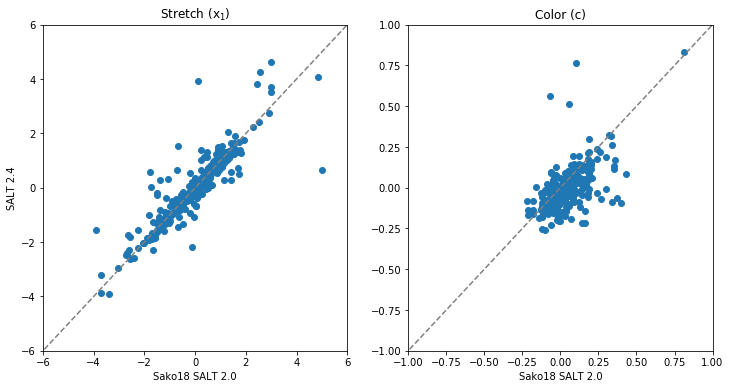

In [10]:
_ = compare_salt_versions(combined)


In [44]:
def stretch_vs_color(salt2_data, sako_data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    axes[0].scatter(salt2_data.x1, salt2_data.c, alpha=.5)
    axes[0].set_xlabel(r'Stretch (x$_1$)')
    axes[0].set_ylabel('Color')
    axes[0].set_title('Pipeline Fits')
    
    axes[1].scatter(sako_data.x1SALT2flat, sako_data.cSALT2flat, alpha=.5)
    axes[1].set_xlabel(r'Stretch (x$_1$)')
    axes[1].set_title('Sako et. al 2018')
    axes[1].set_xlim(-6, 6)
    axes[1].set_ylim(-1, 1)

    return fig, axes


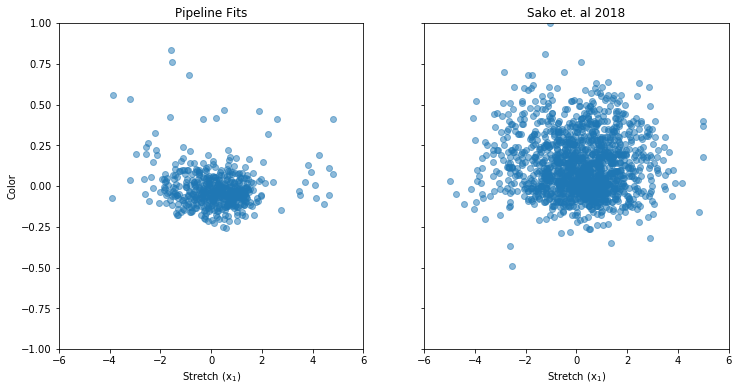

In [45]:
_ = stretch_vs_color(salt2_fits, sako_sneia)


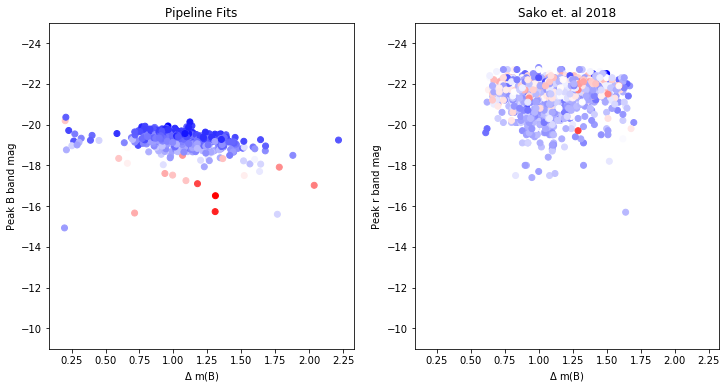

In [89]:
def peak_vs_dm15(salt2_data, sako_data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
    
    axes[0].scatter(salt2_data.delta_15, salt2_data.b_max, c=salt2_data.c, cmap='bwr')
    axes[0].set_xlabel(r'$\Delta$ m(B)')
    axes[0].set_ylabel('Peak B band mag')
    axes[0].set_title('Pipeline Fits')
    axes[0].set_ylim(-25, -9)
    axes[0].invert_yaxis()
    
    axes[1].scatter(sako_data.dm15PSNIDflat, -sako_data.Peakrmag, c=sako_data.cSALT2flat, cmap='bwr')
    axes[1].set_xlabel(r'$\Delta$ m(B)')
    axes[1].set_ylabel('Peak r band mag')
    axes[1].set_title('Sako et. al 2018')
    axes[1].set_ylim(-25, -9)
    axes[1].invert_yaxis()
    
    #plt.colorbar(sc)

    return fig, axes


_ = peak_vs_dm15(salt2_fits, sako_sneia)
